# info

`-` 해당 자료는 2021년 전북대학교 통계학과 대학원 수업 고급시계열분석 자료를 바탕으로 만들어졌습니다.

# Q1

시계열자료 분석의 목적은 무엇인가?

## Solution

시계열 자료의 분석은 크게 예측과 제어로 나뉜다.

* 예측 (forecast) : 시계열자료의 패턴이 미래에도 지속적으로 유지된다는 가정 하에서, 현재까지 수집된 자료들을 분석하여 미래의 자료를 예측함

 * 제어 (control) : 시계열자료가 생성된 시스템 또는 확률과정을 모형화하여 시스템 또는 확률과정을 이해하는 것

# Q2

각각의 데이터를 그려보고 어떠한 성분으로 구성되어 있는지를 설명하라

## Solution

In [3]:
# code-fold : true
library(forecast) ## 예측값을 구하기 위한 패키지
library(TTR) ## 이동평균법을 이용하기 위한 패키지
library(lmtest) ## 더비-왓슨 검정 
library(tidyverse) ## 전처리 패키지

setwd("C:\\Users\\lee\\Desktop\\고급시계열 분석\\제5판_시계열분석_프로그램\\제5판 시계열분석 data")

In [6]:
female <- scan("female.txt")
build <- scan("build.txt")
export <- scan("export.txt")
usapass <- scan("usapass.txt")

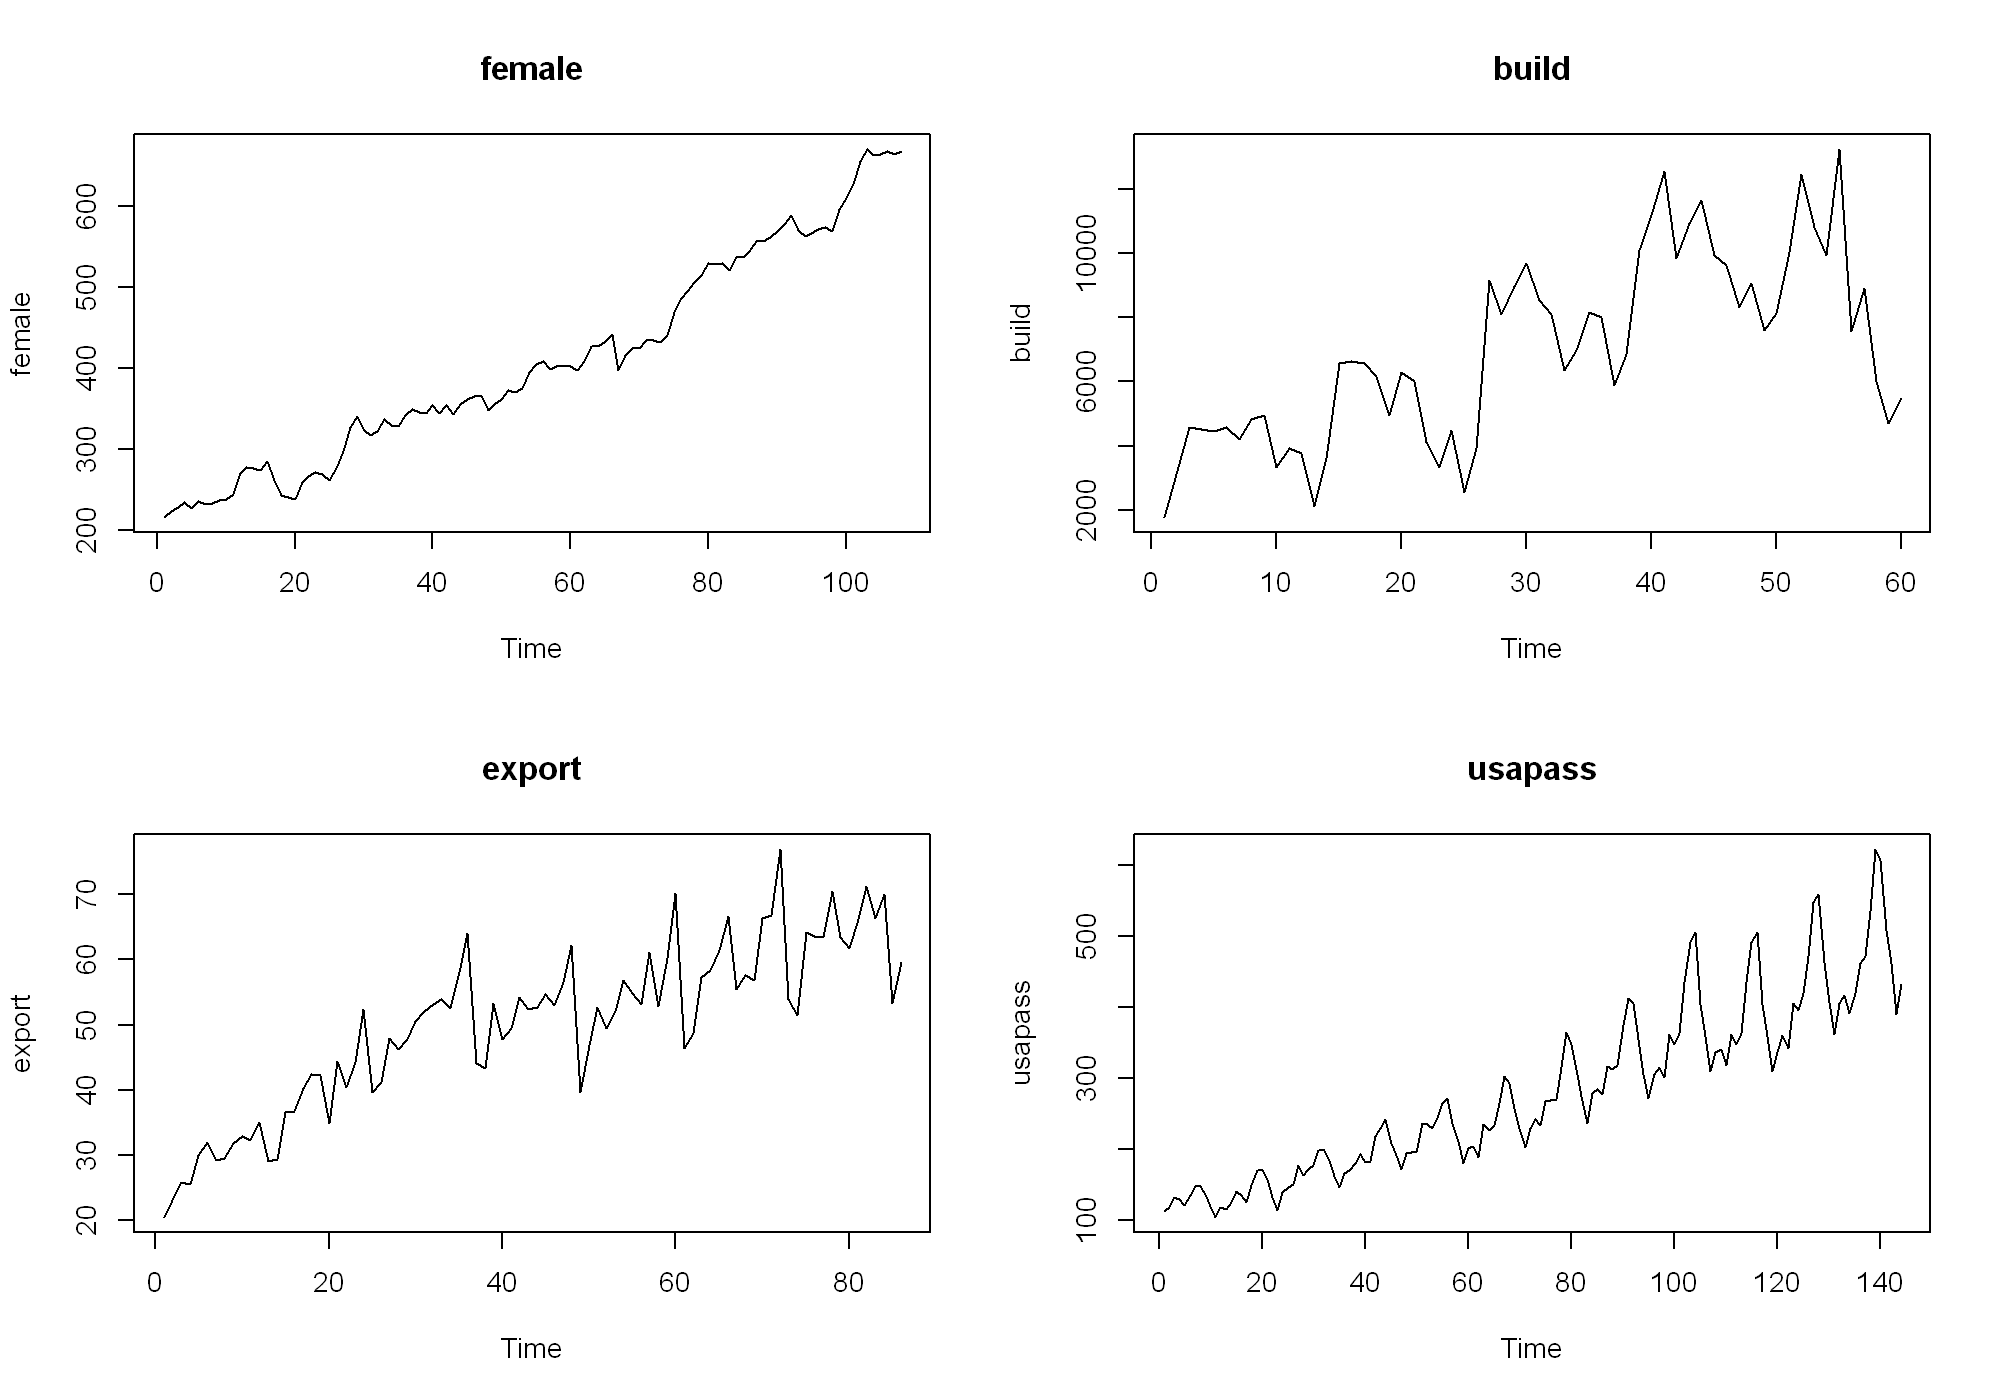

In [11]:
options(repr.plot.res=200,repr.plot.width=10)
par(mfrow=c(2,2))
plot.ts(female,main="female"); plot.ts(build,main="build")
plot.ts(export,main="export"); plot.ts(usapass,main="usapass")

* female : 추세성분 + 불규칙성분
* build  : 추세성분 + 계절성분 + 불규칙성분
* export : 추세성분 + 계절성분 + 불규칙성분
* usapass : 추세성분 + 계절성분 + 불규칙성분



# Q3

모형적합의 3단계 절차

## Solution

`1`. 모형의 식별 : 시도표, 자기상관함수, 부분자기상관함수, 산점도 등을 통해 추세모형 or ARIMA 등 적당한 모형을 선정

`2`. 모형의 추정 : 적률처정법, 최소제곱법, 최대가능도법 등을 통해 모수를 추정

`3`. 모형의 진단 : 모수의 유의성, 잔차의 시계열 그림, 잔차의 자기상관함수, 잔차의 부분자기상관함수, Ljung box의 포트멘토 통계량, AIC 등을 통해 모형을 진단 $\to$ 진단 결과 부적절하다면 모형의 식별로 돌아가 다시 같은 과정을 반복함.

# Q4

시계열 예측모형의 종류

## Solution

* 주관적 모형 : 모형을 수립하기에 자료가 불충분하거나 개인의 경험에 의존하여 예측을 하는 경우

* 객관적 모형 : 수리적인 모형에 기초를 두고 자료가 생성된 시스템이 미래에 변하지 않는다는 가정 하 과거의 자료를 이용하여 설명력이 높은 모형을 이용하여 예측하는 경우
    * 추세분석 : 설명변수로 시간에 대한 함수를 가정하고 회귀분석을 통해 미래값을 예측
    * 평활법 : 이동평균법, 지수평활과 같이 최근의 자료에 큰, 과거의 자료에 적은 가중치를 주는 예측방법
    * ARIMA : 현 시점의 관측값을 과거의 관측값들과 백색잡음이라고 부르는 오차의 선형결합인 형태로 표현하는 모형 (가장 많이 쓰임)